
===== Logistic Regression Performance =====
Accuracy : 0.8569966219674481
Precision: 0.7363684489147697
Recall   : 0.6074235807860262

Classification Report:

              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7479
        >50K       0.74      0.61      0.67      2290

    accuracy                           0.86      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.86      0.85      9769


===== Decision Tree Performance =====
Accuracy : 0.8514689323369843
Precision: 0.7650031585596968
Recall   : 0.52882096069869

Classification Report:

              precision    recall  f1-score   support

       <=50K       0.87      0.95      0.91      7479
        >50K       0.77      0.53      0.63      2290

    accuracy                           0.85      9769
   macro avg       0.82      0.74      0.77      9769
weighted avg       0.84      0.85      0.84      9769



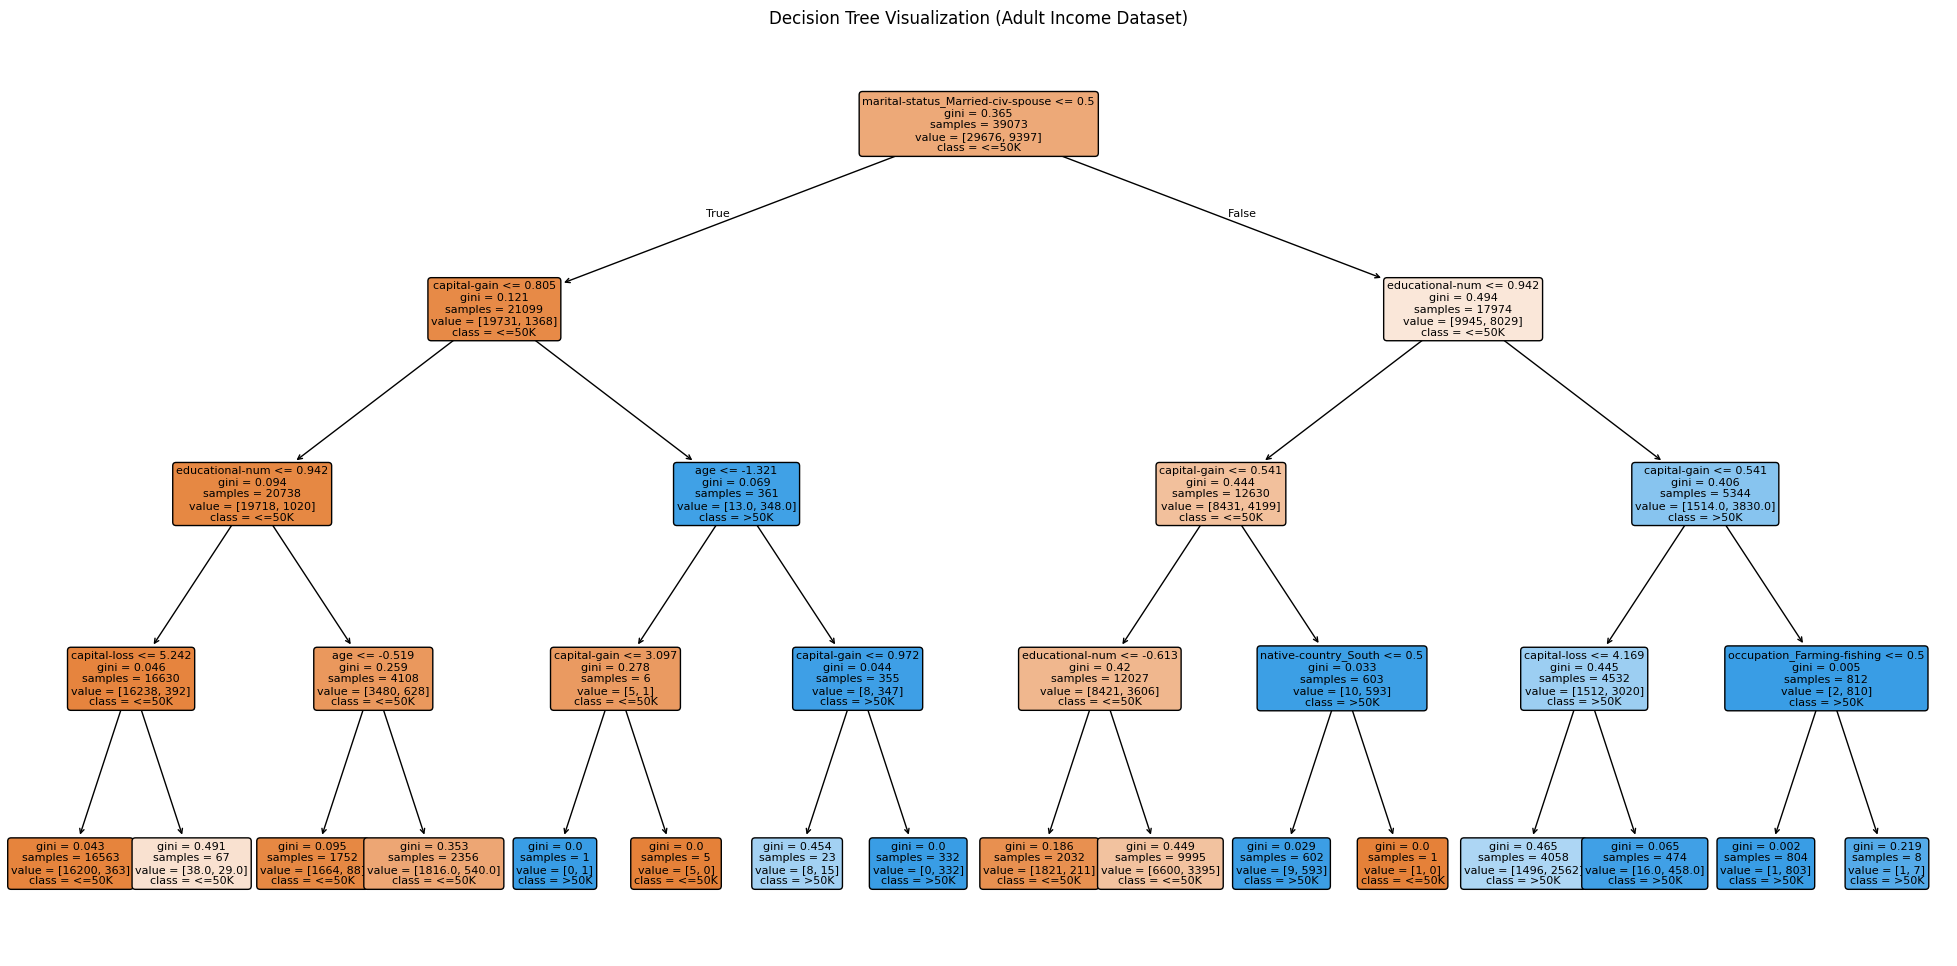

In [4]:
# ==========================================
# 1. IMPORT LIBRARIES
# ==========================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt

# ==========================================
# 2. LOAD DATASET
# ==========================================
df = pd.read_csv("/content/adult.csv.zip")  # <-- make sure adult.csv is in your folder

X = df.drop("income", axis=1)
y = df["income"]

# ==========================================
# 3. COLUMN TYPES
# ==========================================
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# ==========================================
# 4. PREPROCESSING PIPELINE
# ==========================================
preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numerical_cols)
    ]
)

# ==========================================
# 5. TRAIN-TEST SPLIT
# ==========================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ==========================================
# 6. LOGISTIC REGRESSION MODEL
# ==========================================
log_reg = Pipeline(steps=[
    ("preprocess", preprocess),
    ("log_reg", LogisticRegression(max_iter=200))
])

log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("\n===== Logistic Regression Performance =====")
print("Accuracy :", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr, pos_label=">50K"))
print("Recall   :", recall_score(y_test, y_pred_lr, pos_label=">50K"))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_lr))

# ==========================================
# 7. DECISION TREE MODEL
# ==========================================
dt_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("tree", DecisionTreeClassifier(max_depth=4, random_state=42))
])

dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("\n===== Decision Tree Performance =====")
print("Accuracy :", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt, pos_label=">50K"))
print("Recall   :", recall_score(y_test, y_pred_dt, pos_label=">50K"))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_dt))

# ==========================================
# 8. VISUALIZE DECISION TREE USING MATPLOTLIB
# ==========================================
plt.figure(figsize=(25, 12))

tree_clf = dt_model.named_steps["tree"]

# Get feature names AFTER encoding
encoder = dt_model.named_steps["preprocess"].named_transformers_["cat"]
encoded_features = encoder.get_feature_names_out(categorical_cols)
all_features = np.concatenate([encoded_features, numerical_cols])

plot_tree(
    tree_clf,
    feature_names=all_features,
    class_names=["<=50K", ">50K"],
    filled=True,
    fontsize=8,
    rounded=True
)

plt.title("Decision Tree Visualization (Adult Income Dataset)")
plt.show()
